In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
import sympy

In [ ]:
def makeFuncGraph(fx):
    x_values = np.linspace(-3, 3, 400)

    y_values = fx(x_values)

    plt.figure(figsize=(8, 6))
    
    plt.plot(x_values, y_values, label='Function', color='b')
    
    plt.title('f(x)')
    
    plt.xlabel('x')
    plt.ylabel('f(x)')

    plt.axhline(0, color='black', linewidth=1.5)
    plt.axvline(0, color='black', linewidth=1.5)


    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
def makeGraph(a, b, f, x_coords, y_coords, function_name, root_value):
    x = np.linspace(a, b, 100)
    y = [f(i) for i in x]

    plt.plot(x, y, label='Function', linewidth=2)

    plt.scatter(x_coords[:-1], y_coords[:-1], color='red', label='Points', s=50, marker='x')  # type: ignore

    if root_value is not None:
        plt.scatter(root_value[0], root_value[1], color='green', label='Exact Root', s=50, marker='o') # type: ignore

    plt.axhline(0, color='black', linewidth=1.5)
    plt.axvline(0, color='black', linewidth=1.5)
    
    plt.grid(color='gray', linestyle='-', linewidth=0.5)

    if root_value is None:
        plt.title('Function Graph')
    else:
        plt.title(f'{function_name} Function Graph')
        
    plt.xlabel('x', fontsize=12)
    plt.ylabel('f(x)', fontsize=12)
    
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
def bisection(f, a, b, precision, n, show_table, show_graph):
    print("===========================- Bisection -===========================\n")
    
    # Checking if the initial points are valid
    if f(a) * f(b) >= 0:
        return False

    # Creating a table to store iteration results if requested
    table = PrettyTable()
    table.field_names = ["N", "A", "B", "X", "F(X)", "F(A)", "F(A) * F(X)"]
    
    # Initializing variables to store the x points and coordinates for graphing
    x_points = [] 
    x_coords = a
    y_coords = b
    
    x = a
      
    # Iterating through the process for a maximum of n times
    for i in range(0, n):
        # Checking if the interval is already small enough
        if abs(b - a) < precision:
            break
    
        # Calculating the midpoint of the interval
        x = (a + b) / 2
        
        # Storing the current midpoint in the list of x points
        x_points.append(x)
        
        # Adding the current iteration values to the table
        table.add_row([i+1, a, b, x, f(x), f(a), f(a)*f(x)])
        
        # Updating the interval boundaries based on the sign of the function
        if f(a) * f(x) > 0:
            a = x
        else:
            b = x
    
    # Printing the table if requested
    if show_table:
        print(table)
        
    # Creating a graph of the iterations if requested
    if show_graph:
        y_points = [f(i) for i in x_points]
        makeGraph(x_coords, y_coords, f, x_points, y_points, 'Bisection', root_value=(x_points[-1], y_points[-1]))
    
    # Printing the final root approximation
    print(f"ROOT: {x}\n\n")
    
    # Returning the final root approximation
    return x

In [ ]:
def falsePosition(f, a, b, precision, n, show_table, show_graph):
    print("===========================- False Position -===========================\n")
    
    # Checking if the initial points are valid
    if (f(a) * f(b)) >= 0:
        return False
    
    # Creating a table to store iteration results if requested
    table = PrettyTable()
    table.field_names = ["N", "A", "B", "X", "F(X)"]

    # Initializing variables to store the x points and coordinates for graphing
    x_points = [] 
    x_coords = a
    y_coords = b
    
    x = a

    # Iterating through the process for a maximum of n times
    for i in range(0, n):
        # Checking if the interval is already small enough
        if abs(b - a) < precision:
            break
        
        # Calculating the next approximation using false position method
        x = ((a * f(b)) - (b * f(a))) / (f(b) - f(a))

        # Storing the current approximation in the list of x points
        x_points.append(x)
        
        # Adding the current iteration values to the table
        table.add_row([i+1, a, b, x, f(x)])
        
        # Updating the interval boundaries based on the sign of the function
        if f(a) * f(x) > 0:
            a = x
        else:
            b = x

    # Printing the table if requested
    if show_table:
        print(table)
        
    # Creating a graph of the iterations if requested
    if show_graph:
        y_points = [f(i) for i in x_points]
        makeGraph(x_coords, y_coords, f, x_points, y_points, 'False Position', root_value=(x_points[-1], y_points[-1]))
    
    # Printing the final root approximation
    print(f"ROOT: {x}\n\n")
    
    # Returning the final root approximation
    return x

In [ ]:
def newtonRaphson(f, x, precision, n, show_table, show_graph):
    print("===========================- Newton Raphson -===========================\n")
    
    # Checking if the initial point is already close enough to the root
    if abs(f(x)) < precision:
        return x
    
    # Creating a table to store iteration results if requested
    table = PrettyTable()
    table.field_names = ['N', 'X^n', 'F(X^n)']
    
    # Storing the initial x point in the list of x points
    x_points = []
    x_points.append(x)

    # Storing the initial x coordinate for graphing purposes
    x_coords = x
    
    # Defining the symbol for the variable x
    x_symbol = sympy.symbols('x_symbol')

    # Defining a function to calculate the derivative of f(x)
    def derivative(x):
        return sympy.diff(f(x_symbol), x_symbol).subs(x_symbol, x)                              

    # Initializing the step size h using the first iteration
    h = (f(x) / derivative(x))

    # Iterating through the process for a maximum of n times
    for i in range(0, n):
        table.add_row([i+1, x, f(x)])
        
        # Checking if the step size is already small enough
        if abs(h) < precision:
            break
        
        # Adding the current iteration values to the table
        
        # Calculating the step size using the current point
        h = (f(x) / derivative(x))
        
        # Updating the current point using the step size
        x = x - h
        
        # Storing the current point in the list of x points
        x_points.append(x)
        
    # Printing the table if requested
    if show_table:
        print(table)
        
    # Creating a graph of the iterations if requested
    if show_graph:
        y_points = [f(i) for i in x_points]
        makeGraph(x_coords, float(h), f, x_points, y_points, 'Newton Raphson', root_value=(x_points[-1], y_points[-1]))

    # Printing the final root approximation
    print(f"ROOT: {x}\n\n")
    
    # Returning the final root approximation
    return x

In [ ]:
def secant(f, x1, x2, precision, n, show_table, show_graph):
    print("===========================- Secant -===========================\n")
    
    # Checking if the initial points are valid
    if ((f(x1) * f(x2)) >= 0):
        return False
    
    # Creating a table to store iteration results if requested
    table = PrettyTable()
    table.field_names = ['N', 'X^n', 'F(X^n)']
    
    # Storing the initial x1 point in the list of x points
    x_points = []
    x_points.append(x1)
    
    # Initializing variables for coordinates in the graph
    x_coords = x1
    y_coords = x2
    
    xm = 0
    x = 0
    c = 0

    # Iterating through the process for a maximum of n times
    for i in range(0, n):
        # Adding the current iteration values to the table
        table.add_row([i+1, x, f(x)])
        
        # Calculating the next approximation using the secant method
        x = ((x1 * f(x2) - x2 * f(x1)) / (f(x2) - f(x1)))
        
        # Checking if the function value at the new point is zero
        c = f(x1) * f(x)

        # Updating the previous points for the next iteration
        x1 = x2 
        x2 = x 
        
        # Checking if the function value is already zero at the new point
        if (c == 0): 
            break 
        
        # Calculating the midpoint between the current and previous approximations
        xm = ((x1 * f(x2) - x2 * f(x1)) / (f(x2) - f(x1))) 
        
        # Storing the midpoint in the list of x points
        x_points.append(xm)
        
        # Checking if the precision condition is met
        if(abs(xm - x) < precision):
            break 

    # Adding the final iteration values to the table
    table.add_row([i+2, x, f(x)])        
    
    # Printing the table if requested
    if show_table:
        print(table)
        
    # Creating a graph of the iterations if requested
    if show_graph:
        y_points = [f(i) for i in x_points]
        makeGraph(x_coords, y_coords, f, x_points, y_points, 'Secant', root_value=(x_points[-1], y_points[-1]))

    # Printing the final root approximation
    print(f"ROOT: {x}\n\n")
    
    # Returning the final root approximation
    return x

In [ ]:
# Exercicio 2

fx = lambda x: 230*x**4 + 18*x**3 + 9*x**2 - 221*x - 9
makeFuncGraph(fx)

# falsePosition(fx, -1, 0, 0.000001, 1000, True, True)
# falsePosition(fx, 0, 1, 0.000001, 100, True, True)

# secant(fx, 0, 1, 0.000001, 100, True, True)
# secant(fx, -1, 0, 0.000001, 100, True, True)

# newtonRaphson(fx, 0.5, 0.000001, 100, True, True)
# newtonRaphson(fx, -0.5, 0.000001, 100, True, True)

/tmp/ipykernel_6920/1029354956.py:13: RuntimeWarning: invalid value encountered in arcsin
  fx = lambda h: l * ((0.5 * math.pi * r**2 ) - (r**2 * np.arcsin(h / r)) - (np.sqrt(h*(r**2 - h**2)))) - v
/tmp/ipykernel_6920/1029354956.py:13: RuntimeWarning: invalid value encountered in sqrt
  fx = lambda h: l * ((0.5 * math.pi * r**2 ) - (r**2 * np.arcsin(h / r)) - (np.sqrt(h*(r**2 - h**2)))) - v


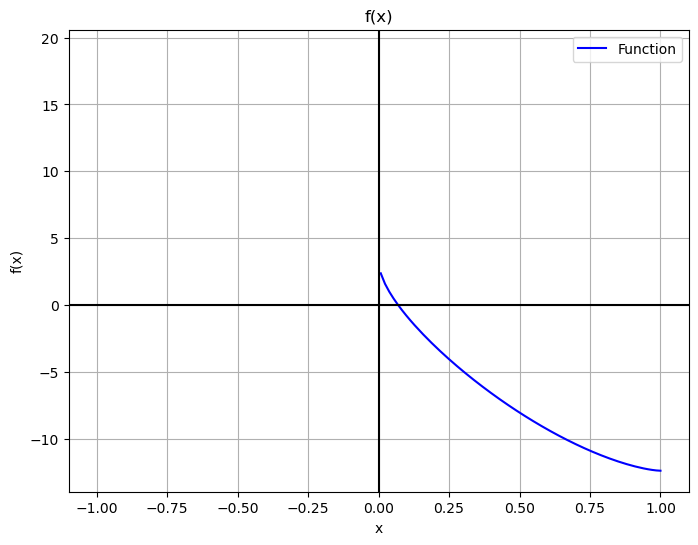

In [117]:
# Exercicio 3

# v = l [0,5πr2 - r2arcsen(h/r) - h(r2 – h2)1/2]

# Suponha que l = 10 pés, r = 1 pé e v = 12,4 pés. Usando o Método da Bissecção,
# determine a profundidade da água na gamela com precisão de 0,01 pé

v = 12.4
l = 10
r = 1

# fx = lambda h: l * ( (0.5 * math.pi * r**2 ) - (r**2 * math.asin(h / r)) - (math.sqrt(h(r**2 - h**2))) ) - v
fx = lambda h: l * ((0.5 * math.pi * r**2 ) - (r**2 * np.arcsin(h / r)) - (np.sqrt(h*(r**2 - h**2)))) - v

makeFuncGraph(fx)